**Método de Runge Kutta de orden 4**

importamos las librerias

In [29]:
#importamos las librerias a utilizar
import matplotlib.pyplot as plt
import numpy as np 

**Método de Runge Kuta de orden 4**

De la formula de Runge-Kutta de orden 4 tenemos:

$$ m_1 = f(t_i,y_i, u_i, z_i) $$
$$ k_1 =g(t_i,y_i, u_i, z_i) $$
$$ r_1 =h(t_i,y_i, u_i, z_i) $$

$$ m_2 = f\left(t_i+ \dfrac{h}{2},y_i+\dfrac{h}{2}m_1, u_i+\dfrac{h}{2}k_1 , z_i+\dfrac{h}{2}r_1 \right) $$
$$ k_2 = g\left(t_i+ \dfrac{h}{2},y_i+\dfrac{h}{2}m_1, u_i+\dfrac{h}{2}k_1 , z_i+\dfrac{h}{2}r_1 \right) $$ 
$$ r_2 = h\left(t_i+ \dfrac{h}{2},y_i+\dfrac{h}{2}m_1, u_i+\dfrac{h}{2}k_1 , z_i+\dfrac{h}{2}r_1 \right) $$ 


$$ m_3 = f\left(t_i+ \dfrac{h}{2},y_i+\dfrac{h}{2}m_2, u_i+\dfrac{h}{2}k_2,z_i+\dfrac{h}{2}r_1 \right) $$
$$ k_3 = f\left(t_i+ \dfrac{h}{2},y_i+\dfrac{h}{2}m_2, u_i+\dfrac{h}{2}k_2,z_i+\dfrac{h}{2}r_1 \right) $$
$$ r_3 = f\left(t_i+ \dfrac{h}{2},y_i+\dfrac{h}{2}m_2, u_i+\dfrac{h}{2}k_2,z_i+\dfrac{h}{2}r_1 \right) $$


$$ m_4 = f\left(t_i+ h,y_i+hm_3, u_i+hk_3, z_i+hr_3 \right) $$
$$ k_4 = f\left(t_i+ h,y_i+hm_3, u_i+hk_3, z_i+hr_3 \right) $$
$$ r_4 = f\left(t_i+ h,y_i+hm_3, u_i+hk_3, z_i+hr_3 \right) $$



Finalmente la aproximación para la EDO:

$$ y_{i+1}=y_i + h\dfrac{m_1+2m_2+2m_3+m_4}{6}  $$ 
$$ u_{i+1}=u_i + h\dfrac{k_1+2k_2+2k_3+k_4}{6}  $$ 
$$ z_{i+1}=z_i + h\dfrac{k_1+2k_2+2k_3+k_4}{6}  $$ 

In [30]:
#Definimos las ecuaciones
def f(t, x, y,z):
  f =  y 
  return (f)

def g(t,x,y,z):
  gt = z
  return (gt)

def q(t,x,y,z):
  z = 5*z-4*y-10*x
  return (z)

In [31]:

def RK4(ti,xi, yi, tf, h,z):
  n = round((tf - ti)/h)                                     #cantidad de intervalos
  t = np.linspace(ti, tf, int(n+1))                   #valores de x
  xf=[]
  xf.append(xi)
  yf=[]                                               #aproximacion de la integral de f'x                                          #vector de k4
  yf.append(yi)
  yz=[]                                               #aproximacion de la integral de f'x                                          #vector de k4
  yz.append(z)

  for i in range (int(n)):
    m1=f(t[i],xf[i], yf[i],yz[i])
    k1=g(t[i],xf[i], yf[i],yz[i])
    r1=q(t[i],xf[i], yf[i],yz[i])

    m2= f(t[i]+(h/2), xf[i]+(h/2)*m1, yf[i]+(h/2)*k1, yz[i]+(h/2)*r1) 
    k2 = g(t[i]+(h/2), xf[i]+(h/2)*m1, yf[i]+(h/2)*k1, yz[i]+(h/2)*r1)
    r2 = q(t[i]+(h/2), xf[i]+(h/2)*m1, yf[i]+(h/2)*k1, yz[i]+(h/2)*r1)

    m3= f(t[i]+(h/2), xf[i]+(h/2)*m2, yf[i]+(h/2)*k2, yz[i]+(h/2)*r2)
    k3 = g(t[i]+(h/2), xf[i]+(h/2)*m2, yf[i]+(h/2)*k2, yz[i]+(h/2)*r2)
    r3 = q(t[i]+(h/2), xf[i]+(h/2)*m2, yf[i]+(h/2)*k2, yz[i]+(h/2)*r2)
    
    m4= f(t[i]+h, xf[i]+h*m3, yf[i]+h*k3, yz[i]+h*k3)
    k4 = g(t[i]+h, xf[i]+h*m3, yf[i]+h*k3, yz[i]+h*k3)
    r4 = q(t[i]+h, xf[i]+h*m3, yf[i]+h*k3, yz[i]+h*k3)
    
    xf.append(xf[i] + (h/6)*(m1 + 2*m2 + 2*m3 + m4))
    yf.append(yf[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4))
    yz.append(yz[i] + (h/6)*(r1 + 2*r2 + 2*r3 + r4))

  return (t,xf,yf,yz)


Digitamos los valores iniciales del sistema.

In [32]:
#Valores iniciales
ti = 0                            #Valor Inicial de 't'
xi = 1
yi = 5                           #Valor inicial de 'y'

#Limite superior de integracion
tf = 1                          #Valor Final de 't'

#Tamaño de Paso o incremento
h1 = 0.1 
z=3                          

#Unvicamos al metodo de Runge - Kutta de oreden 2
t,x1, yf1,yz = RK4(ti,xi ,yi, tf, h1,z)

Valores en pantalla con 8 cifras decimales 

In [33]:
print("t_i       x_i         \ty_i        \tz_i")
for t,x,y,z in zip(t,x1,yf1,yz):
    print(f"{t:.2f}\t{x:.8f}\t{y:.8f}\t{z:.8f}")


t_i       x_i         	y_i        	z_i
0.00	1.00000000	5.00000000	3.00000000
0.10	1.51192917	5.24176250	0.90672083
0.20	2.03448936	5.20743238	-3.12938435
0.30	2.52876682	4.66681738	-10.09684694
0.40	2.92723081	3.27577073	-21.38728080
0.50	3.12009548	0.53054389	-38.93402625
0.60	2.93635780	-4.29331013	-65.39057850
0.70	2.11775327	-12.22182346	-104.35730406
0.80	0.28339354	-24.68851773	-160.66548323
0.90	-3.11771807	-43.67147204	-240.72752492
1.00	-8.86975386	-71.86855934	-352.96074010


Para la grafica de los valores obtenidos 

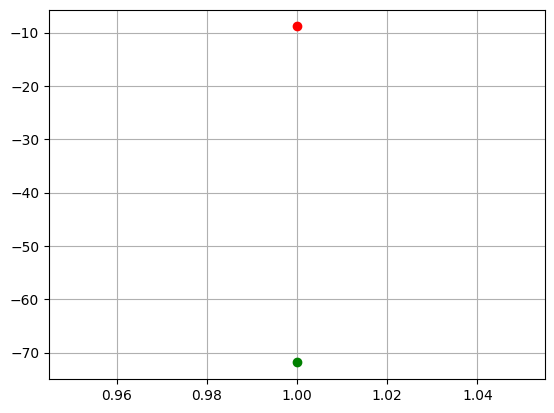

In [34]:
plt.plot(t, x, 'ro')  
plt.plot(t, y,'go')
plt.grid()                                
plt.show() 